In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
data_2019 = pd.read_csv('2019.csv')
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


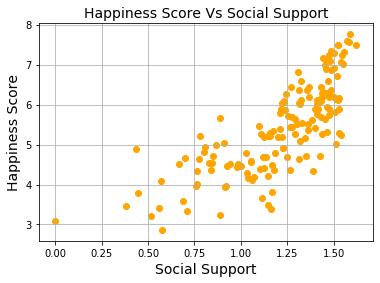

In [35]:
df = data_2019.copy()
plt.scatter(df['Social support'], df['Score'], color='orange')
plt.title('Happiness Score Vs Social Support', fontsize=14)
plt.xlabel('Social Support', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

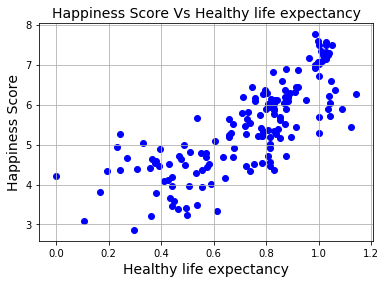

In [36]:
df = data_2019.copy()
plt.scatter(df['Healthy life expectancy'], df['Score'], color='blue')
plt.title('Happiness Score Vs Healthy life expectancy', fontsize=14)
plt.xlabel('Healthy life expectancy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

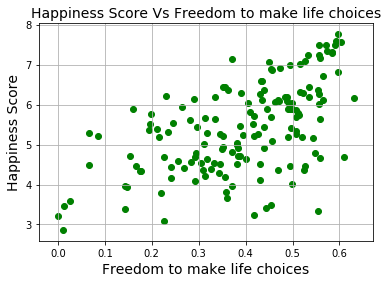

In [37]:
df = data_2019.copy()
plt.scatter(df['Freedom to make life choices'], df['Score'], color='green')
plt.title('Happiness Score Vs Freedom to make life choices', fontsize=14)
plt.xlabel('Freedom to make life choices', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

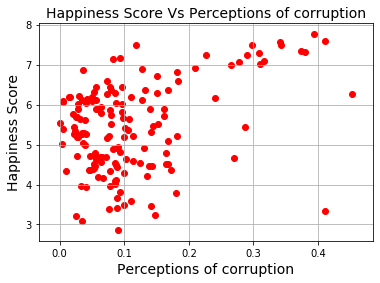

In [38]:
df = data_2019.copy()
plt.scatter(df['Perceptions of corruption'], df['Score'], color='red')
plt.title('Happiness Score Vs Perceptions of corruption', fontsize=14)
plt.xlabel('Perceptions of corruption', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

### Checking for Multicollinearity
#### Multicollinearity is a big problem in regression models, if present it causes regression models to be very sensitive and decreases the precision of the model.


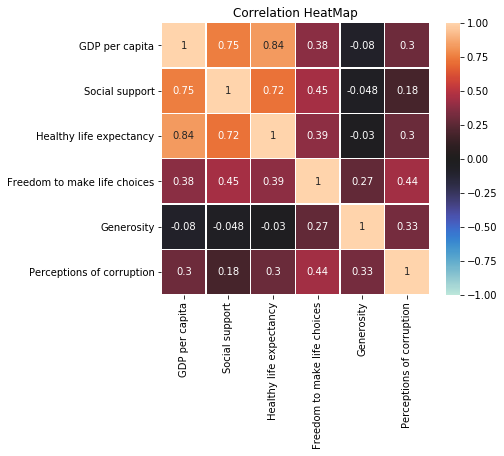

In [11]:
#list of column names to keep
col_names = ["Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

df = data_2019[col_names]

#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)

features = df.loc[:,df.columns != 'Score']
targets = df.loc[:,df.columns == 'Score']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [4]:
# Assign the data to X and y

X = data_2019[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
#X = data_2019[["GDP per capita", "Social support", "Healthy life expectancy"]]
y = data_2019["Score"].values.reshape(-1, 1)
print(X.shape, y.shape)

(156, 6) (156, 1)


In [5]:
#with sklearn - example 2/18
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [1.79522023]
Coefficients: 
 [[0.77537163 1.12419158 1.07814273 1.45483237 0.48978335 0.97228022]]


In [6]:
# "GDP per capita", "Social support", "Healthy life expectancy", 
# "Freedom to make life choices", "Generosity", "Perceptions of corruption"
# prediction with sklearn
New_GDP = 1.34
New_Social_Support = 1.58
New_Health = 0.986
New_Freedom = 0.596
New_Generosity = 0.153
New_CDI = 0.393
print ('Predicted Score: \n', regr.predict([[New_GDP ,New_Social_Support, New_Health, New_Freedom, New_Generosity,New_CDI ]]))

Predicted Score: 
 [[6.99761271]]


In [7]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           2.40e-46
Time:                        20:24:38   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           